In [76]:
from keras.models import load_model
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import json
import nltk
import random
import numpy as np
from random import seed

In [77]:
model = load_model('../chatbot/chatbot_model.h5')

In [78]:
lemmatizer = WordNetLemmatizer()
op = open('intents.json', encoding="utf8")
intents = json.load(op)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [79]:
words = []
classes = []
documents = []
ignoreLetters = ['?', '!', '.', '.']

In [80]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        wordList = nltk.word_tokenize(pattern)
        words.extend(wordList)
        documents.append((wordList, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [81]:
words = [stemmer.stem(word) for word in words if word not in ignoreLetters]
wrodds = sorted(set(words))
classes = sorted(set(classes))

In [82]:
training = []
outputEmpty = [0] * len(classes)

In [83]:
for document in documents:
    # print(document)
    bag = []
    wordPatterns = document[0]
    wordPatterns = [lemmatizer.lemmatize(word.lower()) for word in wordPatterns]
    for word in words:
        bag.append(1) if word in wordPatterns else bag.append(0)
    
    outputRow = list(outputEmpty)
    outputRow[classes.index(document[1])] = 1
    training.append([bag, outputRow])

In [84]:
random.shuffle(training)
training = np.array(training, dtype='object')

x = list(training[:, 0])
y = list(training[:, 1])

In [85]:
from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=80, random_state = 20)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=100, random_state = 42)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, train_size=80)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=80, train_size=20)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=10, train_size=90)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=90, train_size=10)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, train_size=70)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=70, train_size=30)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=40, train_size=60)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=60, train_size=40)

In [86]:
from sklearn.metrics import confusion_matrix
ypred = model.predict(x_test)
ypred_arg= np.argmax(ypred, axis= 1)
ytest_arg= np.argmax(y_test, axis= 1)
confm = confusion_matrix(ytest_arg, ypred_arg)

2/2 [==============================] - 0s 2ms/step


In [87]:
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
from sklearn.metrics import ConfusionMatrixDisplay
import numpy
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix= confm, display_labels=[False, True])
cm_display.plot
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

In [88]:
import pandas as pd
cm_df = pd.DataFrame(confm)

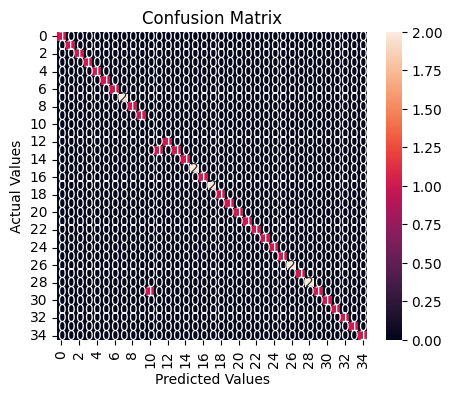

<Figure size 1600x1600 with 0 Axes>

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.figure(figsize=(16,16), dpi=100)
plt.show()

In [90]:
def confusion_matrix_for(cls, cm):
    TP = cm[cls, cls]
    FN = cm[cls].sum() - TP
    FP = cm[:, cls].sum() - TP
    TN = cm.sum() - TP - FN - FP
    return np.array([[TP, FN], [FP, TN]])

TP1= 0
FN1= 0
FP1= 0
TN1= 0

for cls in range(confm.shape[0]):
    print(f'[Class {cls} vs others]')
    TP, FN, FP, TN = confusion_matrix_for(cls, confm).ravel()
    TP1+= TP
    FN1+= FN
    FP1+= FP
    TN1+= TN
    print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')
    
    print()
    
precc = (TP1/(TP1+FP1))*100
recall = (TP1/(TP1+FN1))*100
f1score = 2*(precc*recall)/(recall+precc)
acc = ((TP1+TN1)/(TP1+TN1+FP1+FN1))*100
print('============================Total result====================================')
print(f'TP: {TP1}, FN: {FN1}, FP: {FP1}, TN: {TN1}')
print(f'accuracy : {acc}%; precission : {precc}%; recall : {recall}%; F-1 Score : {f1score}%')


[Class 0 vs others]
TP: 1, FN: 0, FP: 0, TN: 39

[Class 1 vs others]
TP: 1, FN: 0, FP: 0, TN: 39

[Class 2 vs others]
TP: 1, FN: 0, FP: 0, TN: 39

[Class 3 vs others]
TP: 1, FN: 0, FP: 0, TN: 39

[Class 4 vs others]
TP: 1, FN: 0, FP: 0, TN: 39

[Class 5 vs others]
TP: 1, FN: 0, FP: 0, TN: 39

[Class 6 vs others]
TP: 1, FN: 0, FP: 0, TN: 39

[Class 7 vs others]
TP: 2, FN: 0, FP: 0, TN: 38

[Class 8 vs others]
TP: 1, FN: 0, FP: 0, TN: 39

[Class 9 vs others]
TP: 1, FN: 0, FP: 0, TN: 39

[Class 10 vs others]
TP: 0, FN: 0, FP: 1, TN: 39

[Class 11 vs others]
TP: 0, FN: 0, FP: 1, TN: 39

[Class 12 vs others]
TP: 1, FN: 0, FP: 0, TN: 39

[Class 13 vs others]
TP: 1, FN: 1, FP: 0, TN: 38

[Class 14 vs others]
TP: 1, FN: 0, FP: 0, TN: 39

[Class 15 vs others]
TP: 2, FN: 0, FP: 0, TN: 38

[Class 16 vs others]
TP: 1, FN: 0, FP: 0, TN: 39

[Class 17 vs others]
TP: 2, FN: 0, FP: 0, TN: 38

[Class 18 vs others]
TP: 1, FN: 0, FP: 0, TN: 39

[Class 19 vs others]
TP: 1, FN: 0, FP: 0, TN: 39

[Class 20 